In [12]:
import acoular
import numpy as np
ts = acoular.TimeSamples( name='three_sources.h5' )

51200

In [13]:
block_size = 2**(int(np.log2(ts.numsample)) - 1)
ps = acoular.PowerSpectra( time_data=ts, block_size=block_size, window='Hanning' )
rg = acoular.RectGrid( x_min=-0.2, x_max=0.2, y_min=-0.2, y_max=0.2, z=0.3, increment=0.01 )
rg.size

NameError: name 'np' is not defined

In [6]:
from os import path
micgeofile = path.join(path.split(acoular.__file__)[0],'xml','array_64.xml')
mg = acoular.MicGeom( from_file=micgeofile )

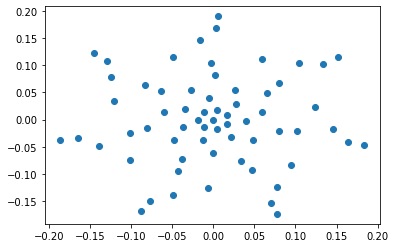

In [7]:
from matplotlib import pyplot as plt
plt.ion()
plt.plot(mg.mpos[0],mg.mpos[1],'o')


[('three_sources_cache.h5', 10)]


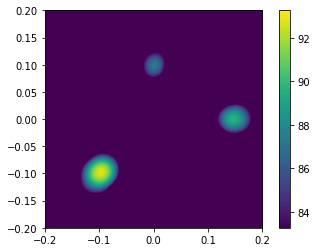

In [21]:
st = acoular.SteeringVector( grid=rg, mics=mg )
bb = acoular.BeamformerBase( freq_data=ps, steer=st )
pm = bb.synthetic( 10000, 3 )
Lm = acoular.L_p( pm )
plt.figure()
plt.imshow( Lm.T, origin='lower', vmin=Lm.max()-10, extent=rg.extend(), interpolation='bicubic')
plt.colorbar()

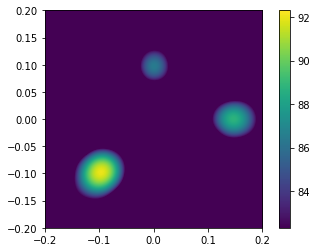